# Image recognition android application project
- Flower image classification with Baseline CNN (20200823)  
- 4685 training set with 5 class, 100 iterations, 32 batch

### Reference
- [coding-practice by **osterburg**], 'https://github.com/osterburg/coding-practice'

## 1. Import packages

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import tarfile
import glob
from six.moves import urllib
from glob import glob
import random
import shutil

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import load_model
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


## 2. Load and Explore the Flower Dataset

In [2]:
def load_data_files(base_dir):
    folder_name = "dataset/flower_photos"
    RAW_DATASET = os.path.join(base_dir, folder_name)

    abs_dir = os.path.join(os.getcwd(), folder_name)
    sub_dir = os.listdir(abs_dir)
    data_dic = {}
    
    for class_name  in sub_dir:
        imgs = glob(os.path.join(RAW_DATASET,class_name,"*.jpg"))

        data_dic[class_name] = imgs
        print("Class: {}".format(class_name))
        print("Number of images: {} \n".format(len(imgs)))

    return data_dic

In [3]:
BASE_DIR = os.getcwd()
data_dic = load_data_files(BASE_DIR)

Class: daisy
Number of images: 1020 

Class: dandelion
Number of images: 1277 

Class: roses
Number of images: 1124 

Class: sunflowers
Number of images: 1158 

Class: tulips
Number of images: 1275 



## 3. Split train and validation dataset

In [4]:
# Create new directory and copy files to it
def copy_files_to_directory(files, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("Created directory: {}".format(directory))

    for f in files:
        shutil.copy(f, directory)
    print("Copied {} files.\n".format(len(files)))

In [5]:
def train_validation_split(base_dir, data_dic, split_ratio=0.2):
    FLOWER_DATASET = os.path.join(base_dir,"flower_dataset")

    if not os.path.exists(FLOWER_DATASET):
        os.makedirs(FLOWER_DATASET)

    for class_name, imgs in data_dic.items():
        idx_split = int(len(imgs) * split_ratio)
        random.shuffle(imgs)
        validation = imgs[:idx_split]
        train = imgs[idx_split:]

        copy_files_to_directory(train, os.path.join(FLOWER_DATASET,"train",class_name))
        copy_files_to_directory(validation, os.path.join(FLOWER_DATASET,"validation",class_name))

In [6]:
# BASE_DIR = os.getcwd()

# train_validation_split(BASE_DIR, data_dic, split_ratio=0.2)

## 4. Image preprocessing

In [7]:
batch_size = 32
num_classes = 5
epochs = 100

In [8]:
preprocessing_image = tf.keras.preprocessing.image

train_datagen = preprocessing_image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = preprocessing_image.ImageDataGenerator(rescale=1./255)

In [9]:
BASE_DIR = os.getcwd()

train_generator = train_datagen.flow_from_directory(
    os.path.join(BASE_DIR, "flower_dataset/train"),
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    os.path.join(BASE_DIR, "flower_dataset/validation"),
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical')

Found 4685 images belonging to 5 classes.
Found 1169 images belonging to 5 classes.


## 5. Baseline CNN model

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_______________________________________

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer=adam(lr=0.0005), metrics=['accuracy'])

## 6. Training

In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 4685//batch_size,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps=20)

Epoch 1/100
146/146 [==============================] - 21s 140ms/step - loss: 1.5938 - accuracy: 0.2551 - val_loss: 1.5450 - val_accuracy: 0.3719
Epoch 2/100
146/146 [==============================] - 20s 139ms/step - loss: 1.4601 - accuracy: 0.3776 - val_loss: 1.3509 - val_accuracy: 0.4528
Epoch 3/100
146/146 [==============================] - 20s 138ms/step - loss: 1.3149 - accuracy: 0.4389 - val_loss: 1.2834 - val_accuracy: 0.5141
Epoch 4/100
146/146 [==============================] - 20s 136ms/step - loss: 1.2365 - accuracy: 0.4786 - val_loss: 1.4835 - val_accuracy: 0.4224
Epoch 5/100
146/146 [==============================] - 20s 137ms/step - loss: 1.2076 - accuracy: 0.4986 - val_loss: 1.1318 - val_accuracy: 0.5219
Epoch 6/100
146/146 [==============================] - 20s 136ms/step - loss: 1.1726 - accuracy: 0.5120 - val_loss: 1.1374 - val_accuracy: 0.5488
Epoch 7/100
146/146 [==============================] - 19s 133ms/step - loss: 1.1655 - accuracy: 0.5220 - val_loss: 1.2254 -

Epoch 57/100
146/146 [==============================] - 19s 133ms/step - loss: 0.7849 - accuracy: 0.7034 - val_loss: 0.9696 - val_accuracy: 0.6875
Epoch 58/100
146/146 [==============================] - 20s 138ms/step - loss: 0.7491 - accuracy: 0.7149 - val_loss: 0.7237 - val_accuracy: 0.6896
Epoch 59/100
146/146 [==============================] - 19s 131ms/step - loss: 0.7678 - accuracy: 0.7057 - val_loss: 0.9985 - val_accuracy: 0.6891
Epoch 60/100
146/146 [==============================] - 21s 140ms/step - loss: 0.7454 - accuracy: 0.7213 - val_loss: 0.6097 - val_accuracy: 0.6976
Epoch 61/100
146/146 [==============================] - 20s 135ms/step - loss: 0.7654 - accuracy: 0.7128 - val_loss: 0.7419 - val_accuracy: 0.6703
Epoch 62/100
146/146 [==============================] - 20s 138ms/step - loss: 0.7509 - accuracy: 0.7205 - val_loss: 1.0359 - val_accuracy: 0.6640
Epoch 63/100
146/146 [==============================] - 19s 133ms/step - loss: 0.7308 - accuracy: 0.7204 - val_loss: 0

## 7. Accuracy Analysis and Visualization

In [13]:
def plot_accuracy_and_loss(history):
    plt.figure(1, figsize= (15, 10))

    # plot train and test accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Baseline CNN Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # plot train and test loss
    plt.subplot(222)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Baseline CNN loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')

    plt.show()

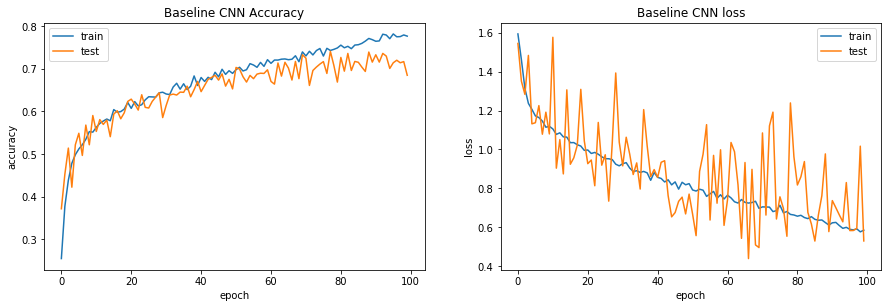

In [14]:
plot_accuracy_and_loss(history)

In [15]:
print("-- Evaluate --")

scores_train = model.evaluate_generator(
            train_generator, 
            steps = 5)
scores_val = model.evaluate_generator(
            validation_generator, 
            steps = 5)

print("%s: %.2f%%" %(model.metrics_names[1], scores_train[1]*100))
print("%s: %.2f%%" %(model.metrics_names[1], scores_val[1]*100))

print("-- Predict --")
output_train = model.predict_generator(train_generator, steps=5)
output_val = model.predict_generator(validation_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(train_generator.class_indices)
print(output_train)

print(validation_generator.class_indices)
print(output_val)

-- Evaluate --
accuracy: 83.13%
accuracy: 73.12%
-- Predict --
{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
[[0.365 0.002 0.073 0.001 0.559]
 [0.003 0.001 0.031 0.001 0.964]
 [0.160 0.644 0.097 0.013 0.087]
 [0.000 0.000 0.000 0.984 0.015]
 [0.033 0.100 0.203 0.535 0.130]
 [0.020 0.835 0.134 0.000 0.010]
 [0.027 0.385 0.001 0.569 0.019]
 [0.004 0.000 0.976 0.000 0.020]
 [0.000 0.000 0.995 0.000 0.005]
 [0.020 0.000 0.960 0.000 0.020]
 [0.061 0.673 0.048 0.163 0.055]
 [0.285 0.348 0.240 0.112 0.015]
 [0.041 0.005 0.002 0.005 0.947]
 [0.160 0.669 0.053 0.008 0.110]
 [0.000 0.038 0.001 0.703 0.258]
 [0.664 0.019 0.063 0.001 0.253]
 [0.036 0.000 0.124 0.000 0.840]
 [0.002 0.002 0.005 0.991 0.000]
 [0.998 0.001 0.001 0.000 0.000]
 [0.249 0.107 0.225 0.004 0.414]
 [0.017 0.000 0.167 0.000 0.815]
 [0.092 0.009 0.224 0.043 0.632]
 [0.338 0.146 0.011 0.001 0.503]
 [0.000 0.001 0.000 0.972 0.026]
 [0.002 0.993 0.003 0.000 0.002]
 [0.086 0.673 0.007 0.167 0.067]
 [0.076 

## 8. Save and Load model

In [16]:
# save model architecture
model_json = model.to_json()
open('2_model.json', 'w').write(model_json)

# save model's learned weights
model.save_weights('2_weights.h5', overwrite=True)

In [17]:
# Load trained model
from keras.models import model_from_json 

json_file = open("2_model.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)
 
# model weight load 
loaded_model.load_weights("2_weights.h5")
print("Loaded model from disk")

Loaded model from disk
